In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

str

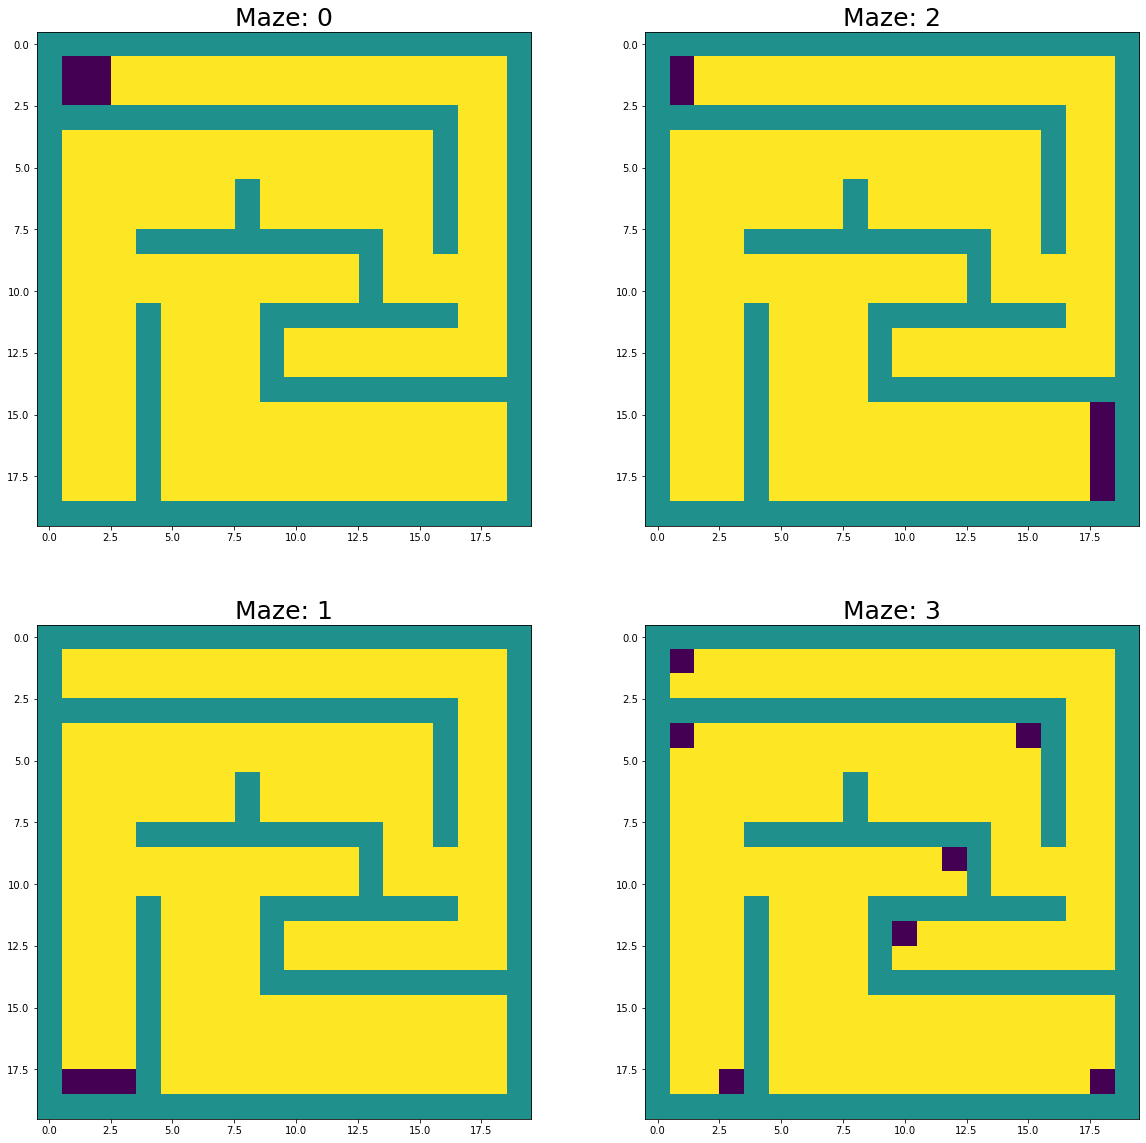

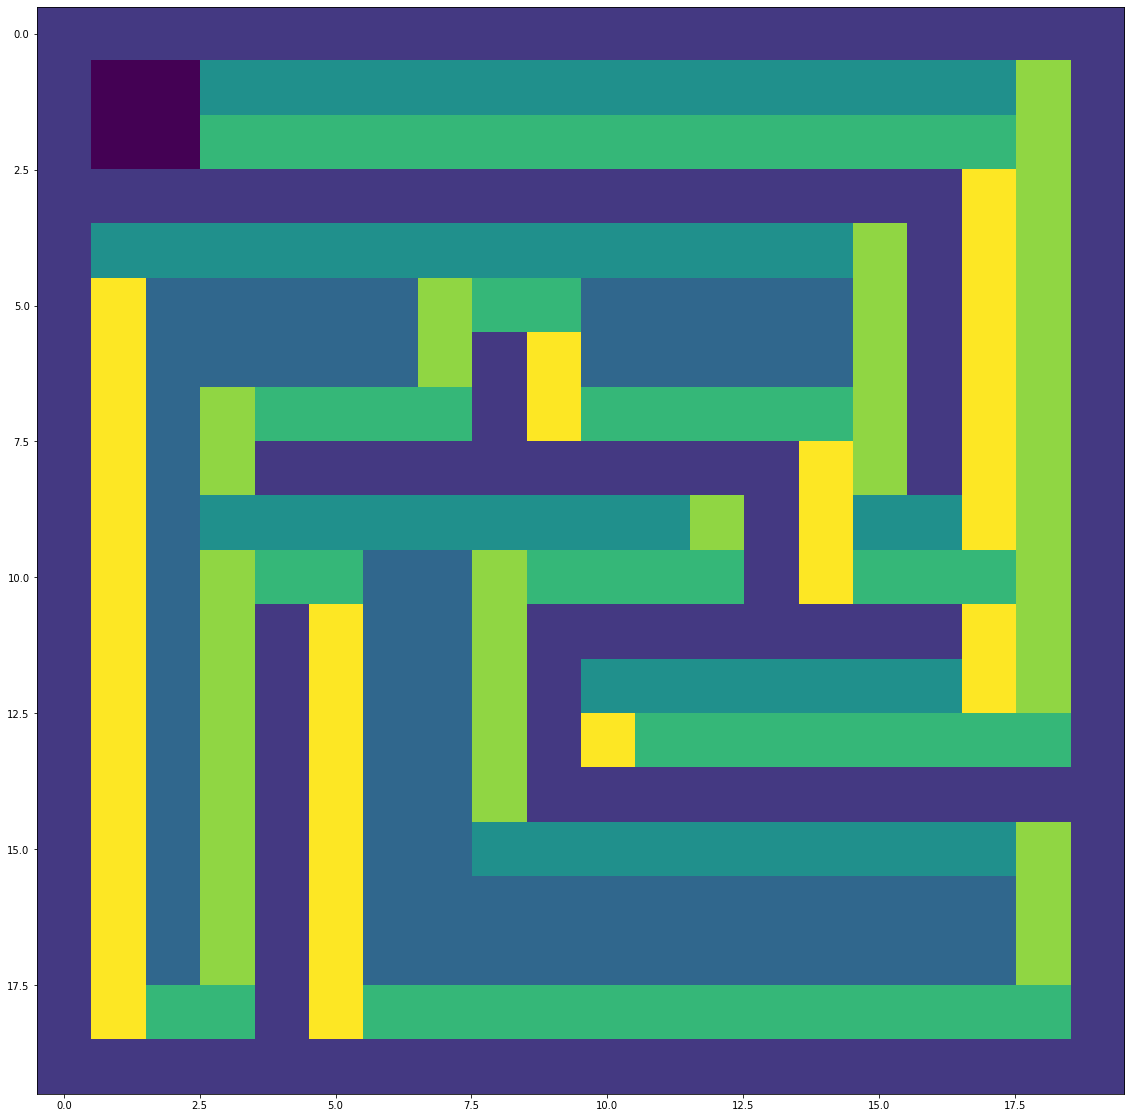

In [22]:
#Load mazes:

f = open('mazes.txt', 'r')

mazes = f.read()
f.close()

#Get the individual mazes:

pad = ''.join(np.repeat('#', 20))

data = mazes.split(pad)

data = [pad + data[i] + pad for i in range(10) if i % 2 == 1]

#Encode the maze in some way: 

def encode_maze (maze):
    
    """
    Encodes maze as an array of integers.
    @encoding:
    encodes walls as 0
    encodes rewards as 5
    endoces paths as 6
    encodes moves (right, down, left, up) as 1,2,3,4
    @params:
    maze := a maze to encode
    """
    
    
    result =  np.array(['1' if char == '#'\
            else '0' if char == 'X'\
            else '2' if char == ' '\
            else '3' if char == '>'\
            else '4' if char == '<'\
            else '5' if char == 'v' \
            else '6' if char == '^' \
            
                        
            else char.strip() for char in maze])
    
    result = np.array(list(filter(lambda char: char in \
                                  ['1', '0', '2', '3', '4', '5', '6', '7'],\
                                  result)))
    
    return result.astype(int).reshape(20,20)





#Encode all mazes:


mazes = np.array([encode_maze(maze) for maze in data[:4]])


#Print mazes:

def show_mazs (data):
    
    fig, axs = plt.subplots(2,2, figsize = (20,20))
    
    plt.rc('figure', titlesize = 50)
    plt.rc('axes', titlesize = 25)
    
    #plt.suptitle('Pan´s Labyrithns')
    
    for iM, maze in np.ndenumerate(data):
    
        i, j = iM[0] % 2, int(iM[0] / 2)
    
        axs[i,j].imshow(encode_maze(maze), cmap = 'viridis')
        axs[i,j].set_title('Maze: {}'.format(iM[0]))
        
show_mazs(data[:4])
plt.figure(figsize = (20,20))
plt.imshow(encode_maze(data[4]))

In [4]:
def trans_model (maze, move, pos):
    
    i,j = pos
    
    trans_mod = {
        1: (i, j+1),
        2: (i+1, j),
        3: (i, j-1),
        4: (i-1, j)
    }
    
    temp_pos = trans_mod.get(move, pos) #return pos upon invalid key
    
    iN, jN = temp_pos
    
    if 19 >= iN >= 0 and 19 >= jN >= 0:
        
        new_pos = temp_pos if maze[temp_pos] != 1 else pos
        
    else:
        
        new_pos = pos
    
    return new_pos

[1, 2, 3, 4]
[[4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.

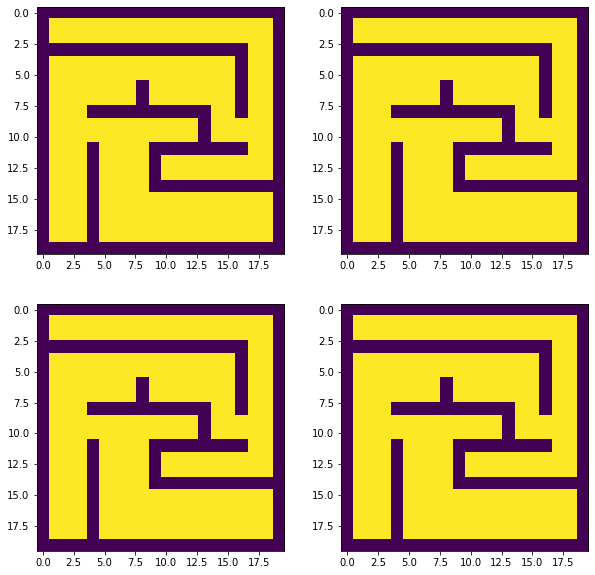

In [5]:
def one_hot (dim, pos):
    
    result = np.zeros(dim)
    result[pos] = 1
    
    return result

def available_moves(maze, pos):
    
    movs = {
        
         3: [1],
         5: [2],
         4: [3],
         6: []
    }
    
    result = movs.get(maze[pos], [1,2,3,4])
    
    return result

print(available_moves(mazes[0], (18,17)))

def get_transition_matrix (maze):
    
    get_pos = lambda col: divmod(col,20)
    
    get_col = lambda pos: 20*pos[0] + pos[1]

    dim = np.prod(maze.shape)
    
    matrix = np.zeros((dim, dim, 4))
    
    for move in [1,2,3,4]:
        
        move_matrix = np.zeros((dim, dim))
        
        for i in range(20):
            
            for j in range(20):
                
                pos = (i,j)
                
                if move in available_moves(maze, pos):
                
                    move_matrix[:,get_col(pos)] = \
                    one_hot(400, get_col(trans_model(maze, move, pos)))
        
        matrix[:,:,move-1] = move_matrix
        
    return matrix

print(get_transition_matrix(encode_maze(data[4])).sum(axis = 2))


def plot_probability (maze):
    
    #Artificially puts the walls back into the equation, otherwise
    #we'll just see a uniform field that is 1 everywhere.
    
    get_walls = lambda maze: np.where(maze == 1, 1, 0)

    fig, axs = plt.subplots (2,2, figsize = (10,10))

    for i in range(4):
    
        iN, jN = i % 2, int(i / 2)
    
        result = get_transition_matrix(mazes[0])[:,:,i].sum(axis = 0).reshape(20,20)

        axs[iN,jN].imshow(result - get_walls(maze), cmap = 'viridis')

        
plot_probability(mazes[0])


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

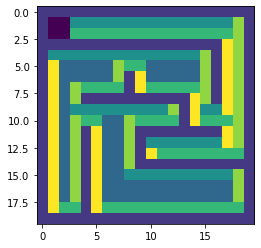

In [6]:
maze5 = encode_maze(data[4])
plt.imshow(maze5)
available_moves(maze5, (6,5))

trans = get_transition_matrix(maze5).sum(axis = 2)[22,]
print(trans * trans)

In [7]:
def value_function (maze, policy, gamma = .9):
    
    #policy:
    
    Ppi = policy * get_transition_matrix(maze).sum(axis = 2)
    
    #reward:
    
    is_reward = lambda mz: np.where(mz == 0, 1, 0)
    
    reward = is_reward(maze).reshape(400)
    
    result = np.linalg.inv(np.eye(400) - gamma * Ppi) @ reward
    
    return result.reshape(20,20)


def plot_value_function (mazes, policy):
    
    fig, axs = plt.subplots(2,2, figsize = (10,10))
    
    for i in range(mazes.shape[0]):
    
        iN, jN = i % 2, int(i / 2)
    
        result = np.log(value_function(mazes[i], policy))

        axs[iN,jN].imshow(result, cmap = 'viridis')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


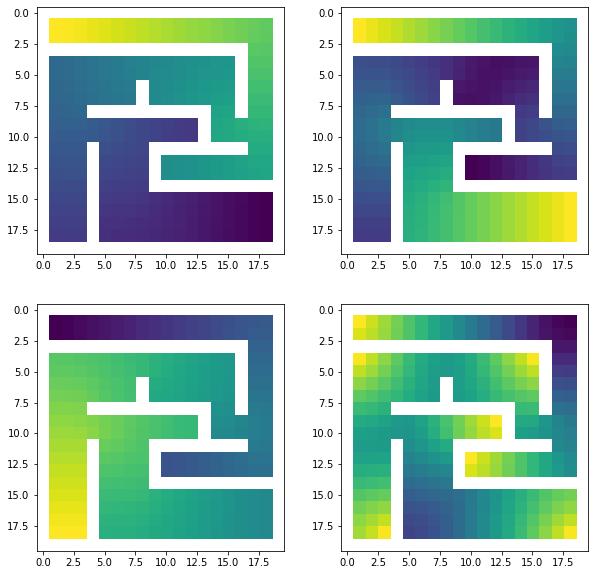

In [8]:
plot_value_function(mazes, np.ones((400,400)) * .25)

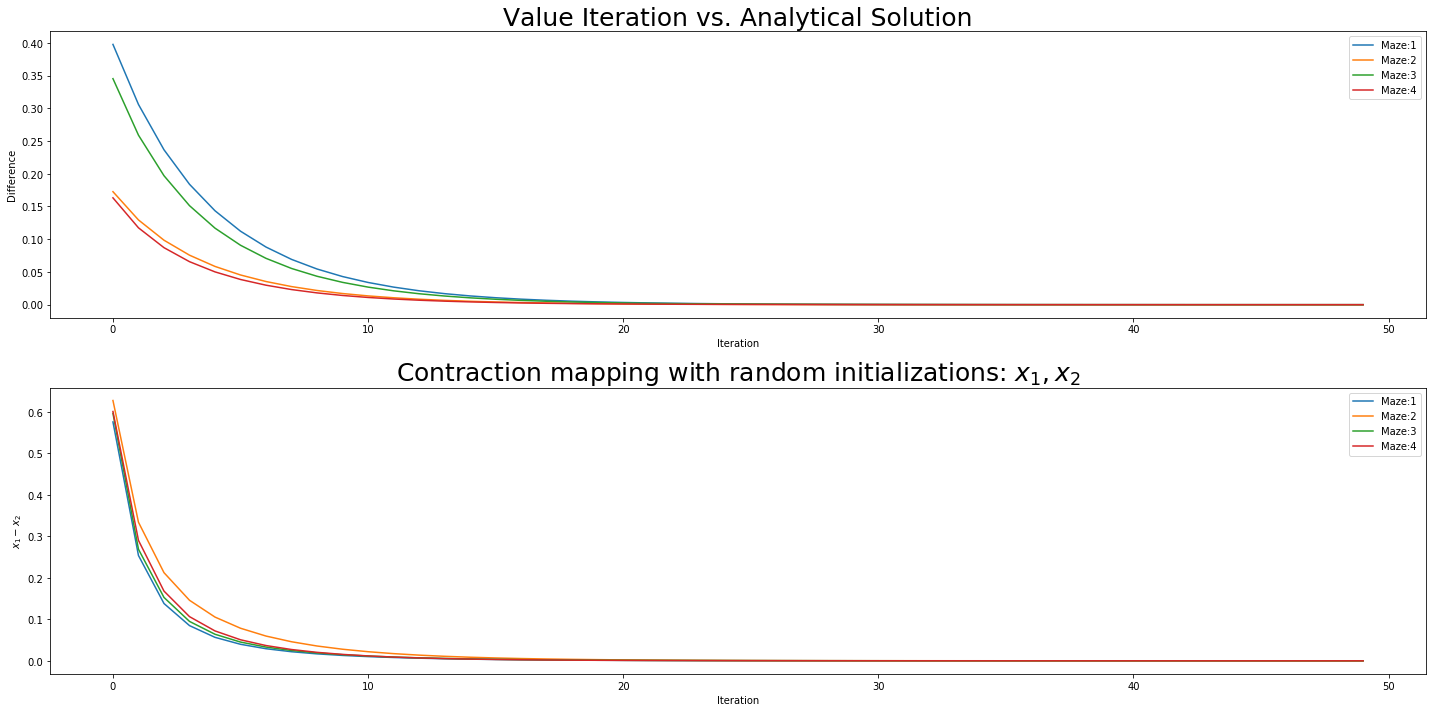

In [9]:
def bellmann (maze, policy, max_steps, init, gamma = .9):
    
    is_reward = lambda mz: np.where(mz == 0, 1, 0)
    
    counter = 0
    
    value = init
    
    result = np.zeros(max_steps)
    
    analytical = value_function(maze, policy).reshape(400)
    
    while counter < max_steps:
        
        value =  is_reward(maze).reshape(400) + gamma \
        * policy * get_transition_matrix(maze).sum(axis = 2) @ value
        
        res = (analytical - value)**2
        
        result[counter] = res.mean()
        
        counter += 1
        
    return result

def contraction_mapping (maze, policy, max_steps, gamma = .9):
    
    
    is_reward = lambda mz: np.where(mz == 0, 1, 0)
    
    result1 = np.random.normal(0,1,400)
    result2 = np.random.normal(0,1,400)
    
    counter = 0
    
    result = np.zeros(max_steps)
    
    while counter < max_steps:
        
        result1 =  is_reward(maze).reshape(400) + gamma \
        * policy * get_transition_matrix(maze).sum(axis = 2) @ result1
        
        result2 =  is_reward(maze).reshape(400) + gamma \
        * policy * get_transition_matrix(maze).sum(axis = 2) @ result2
        
        res = (result1 - result2)**2
        
        result[counter] = res.mean()
        
        counter += 1
        
    return result

def plot_results (mazes, max_steps, init):
    
    counter, policy = 0, .25
    
    fig, axs = plt.subplots(2,1, figsize = (20,10))
    
    plt.suptitle = ("Bellman vs")
    
    while counter < len(mazes):
        
        maze = mazes[counter]
        
        counter += 1
    
        axs[0].plot(bellmann(maze, policy, max_steps, init), label = "Maze:{}".format(counter))
        axs[0].set_title("Value Iteration vs. Analytical Solution")
        axs[0].set_xlabel("Iteration")
        axs[0].set_ylabel("Difference")
        axs[0].legend()
        axs[1].plot(contraction_mapping(maze, policy, max_steps), label = "Maze:{}".format(counter))
        axs[1].set_title(r"Contraction mapping with random initializations: $x_1, x_2$")
        axs[1].set_xlabel("Iteration")
        axs[1].set_ylabel("$x_1 - x_2$")
        axs[1].legend()
        
    fig.tight_layout()
        
        
plot_results(mazes, 50, np.repeat(0,400))

$\textbf{Exercise 2:}$

In [13]:
#Encode given policies as policy matrices:

def build_policy (pmaze):
    
    """
    Builds a transition matrix for all possible moves, along with
    their associated probabilities, then collapses the resulting 
    matrices into a single matrix to obtain the policy.
    @params:
    pmaze := a maze with policy inscribed
    
    """
    
    get_pos = lambda col: divmod(col,20)
    
    get_col = lambda pos: 20*pos[0] + pos[1]
    
    policy = np.ones((400,400))
    
    for col in range(400):
    
        aMoves = available_moves(pmaze, get_pos(col))
    
        policy[:,col] = policy[:,col] / len(aMoves)
            
    return policy



SyntaxError: invalid syntax (<ipython-input-13-77e20f9a9d29>, line 28)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


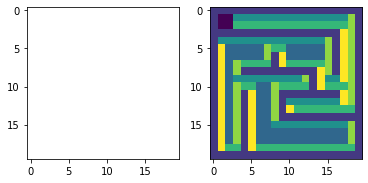

In [11]:
result = value_function(maze5, build_policy(maze5))

print(result)

fig, axs = plt.subplots(1,2)
axs[0].imshow(np.log(result))
axs[1].imshow(maze5)




In [12]:
print(encode_maze(data[4]))

a 

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 1]
 [1 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 5 1]
 [1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 1 6 5 1]
 [1 6 2 2 2 2 2 5 4 4 2 2 2 2 2 5 1 6 5 1]
 [1 6 2 2 2 2 2 5 1 6 2 2 2 2 2 5 1 6 5 1]
 [1 6 2 5 4 4 4 4 1 6 4 4 4 4 4 5 1 6 5 1]
 [1 6 2 5 1 1 1 1 1 1 1 1 1 1 6 5 1 6 5 1]
 [1 6 2 3 3 3 3 3 3 3 3 3 5 1 6 3 3 6 5 1]
 [1 6 2 5 4 4 2 2 5 4 4 4 4 1 6 4 4 4 5 1]
 [1 6 2 5 1 6 2 2 5 1 1 1 1 1 1 1 1 6 5 1]
 [1 6 2 5 1 6 2 2 5 1 3 3 3 3 3 3 3 6 5 1]
 [1 6 2 5 1 6 2 2 5 1 6 4 4 4 4 4 4 4 4 1]
 [1 6 2 5 1 6 2 2 5 1 1 1 1 1 1 1 1 1 1 1]
 [1 6 2 5 1 6 2 2 3 3 3 3 3 3 3 3 3 3 5 1]
 [1 6 2 5 1 6 2 2 2 2 2 2 2 2 2 2 2 2 5 1]
 [1 6 2 5 1 6 2 2 2 2 2 2 2 2 2 2 2 2 5 1]
 [1 6 4 4 1 6 4 4 4 4 4 4 4 4 4 4 4 4 4 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


NameError: name 'a' is not defined

In [ ]:
a = np.eye(3)
a[0,1] = 3
a[0,2] = 15
a.sum(axis = 1)


In [ ]:
1.astype(chr)

